In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rc('font', family='monospace', size=14, serif='courier')
plt.rc('mathtext', fontset='stix')


from scipy.stats import norm

## 1 QDA
(a)

In [2]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: group the points into two arrays pts0, pts1 according to the labels
pts0 = pts[labels==0]
pts1 = pts[labels==1]

# TODO: compute the mean and standard deviations for each class (and print them)
mu_0,std_0 = norm.fit(pts0)
mu_1,std_1 = norm.fit(pts1)

print(f'pts1: \n mu:{mu_0:.6f}, std:{std_0:.6f}')
print(f'pts2: \n mu:{mu_1:.6f}, std:{std_1:.6f}')

pts1: 
 mu:-0.708592, std:1.649707
pts2: 
 mu:0.542157, std:1.278007


(b)

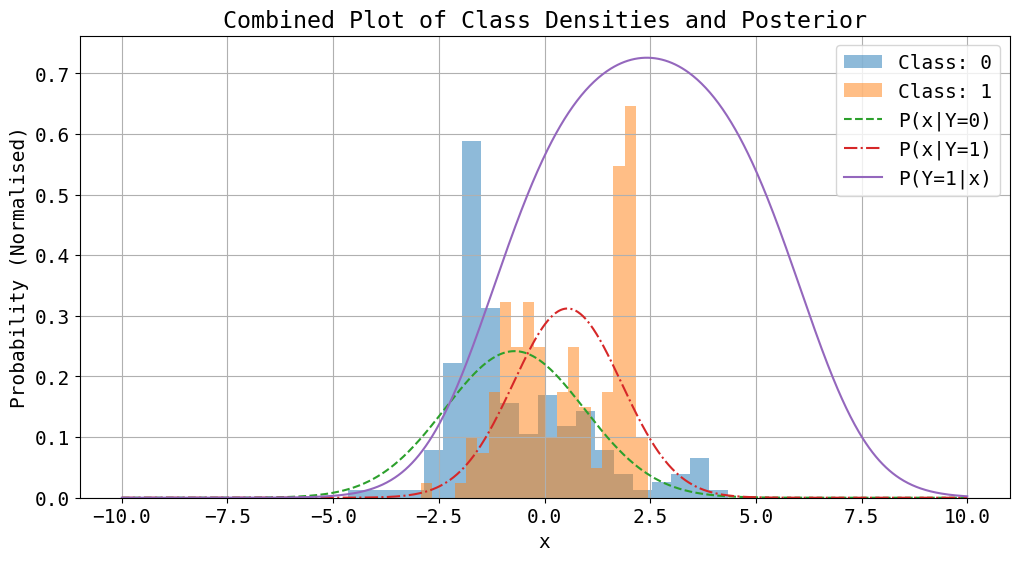

In [4]:
# TODO: evaluate the Gaussian class densities in a range from -10 to 10
x = np.linspace(-10,10,1000)
lkd_0 = norm.pdf(x,mu_0,std_0)
lkd_1 = norm.pdf(x,mu_1,std_1)

# TODO: evaulate the posterior p(y=1|x)
post_0 = lkd_0 / (lkd_0+lkd_1)
post_1 = lkd_1 / (lkd_0+lkd_1)


# TODO: plot the class densities and the posterior p(y=1|x). (Don't forget title, axis labels, legend)
plt.figure(figsize=(12,6))
plt.hist(pts0,label='Class: 0',bins=20,density=True,alpha=0.5)
plt.hist(pts1,label='Class: 1',bins=20,density=True,alpha=0.5)

plt.plot(x,lkd_0,label='P(x|Y=0)',linestyle='--')
plt.plot(x,lkd_1,label='P(x|Y=1)',linestyle='-.')

# plt.plot(x,lkd_0-lkd_1,label='Decision Boundary')
plt.plot(x,post_1,label='P(Y=1|x)')

plt.xlabel('x')
plt.ylabel('Probability (Normalised)')
plt.title('Combined Plot of Class Densities and Posterior')
plt.legend()
plt.grid()

## Plot Inference:
- We can observe that the likelihood of class 0, $P(x|Y=0)$, has more spread and less peak probability than the class 1, $P(x|Y=1)$. 
- Therefore, given the prior probabilities to be equal, $P(x|Y=0) = P(x|Y=1)$, the posterior is only dependent on the class likelihoods, $$P(Y=1|x) = \frac{P(x|Y=1)}{P(x|Y=0) + P(x|Y=1)}$$, hence the mean of posterior is on the positive $x$. 
- The Posterior signifies that the probability of a class $Y=1$ point to be classified in class $Y=1$ is higher than to be classified in class $Y=0$.

# 2. Mean of the Bernoulli Distribution

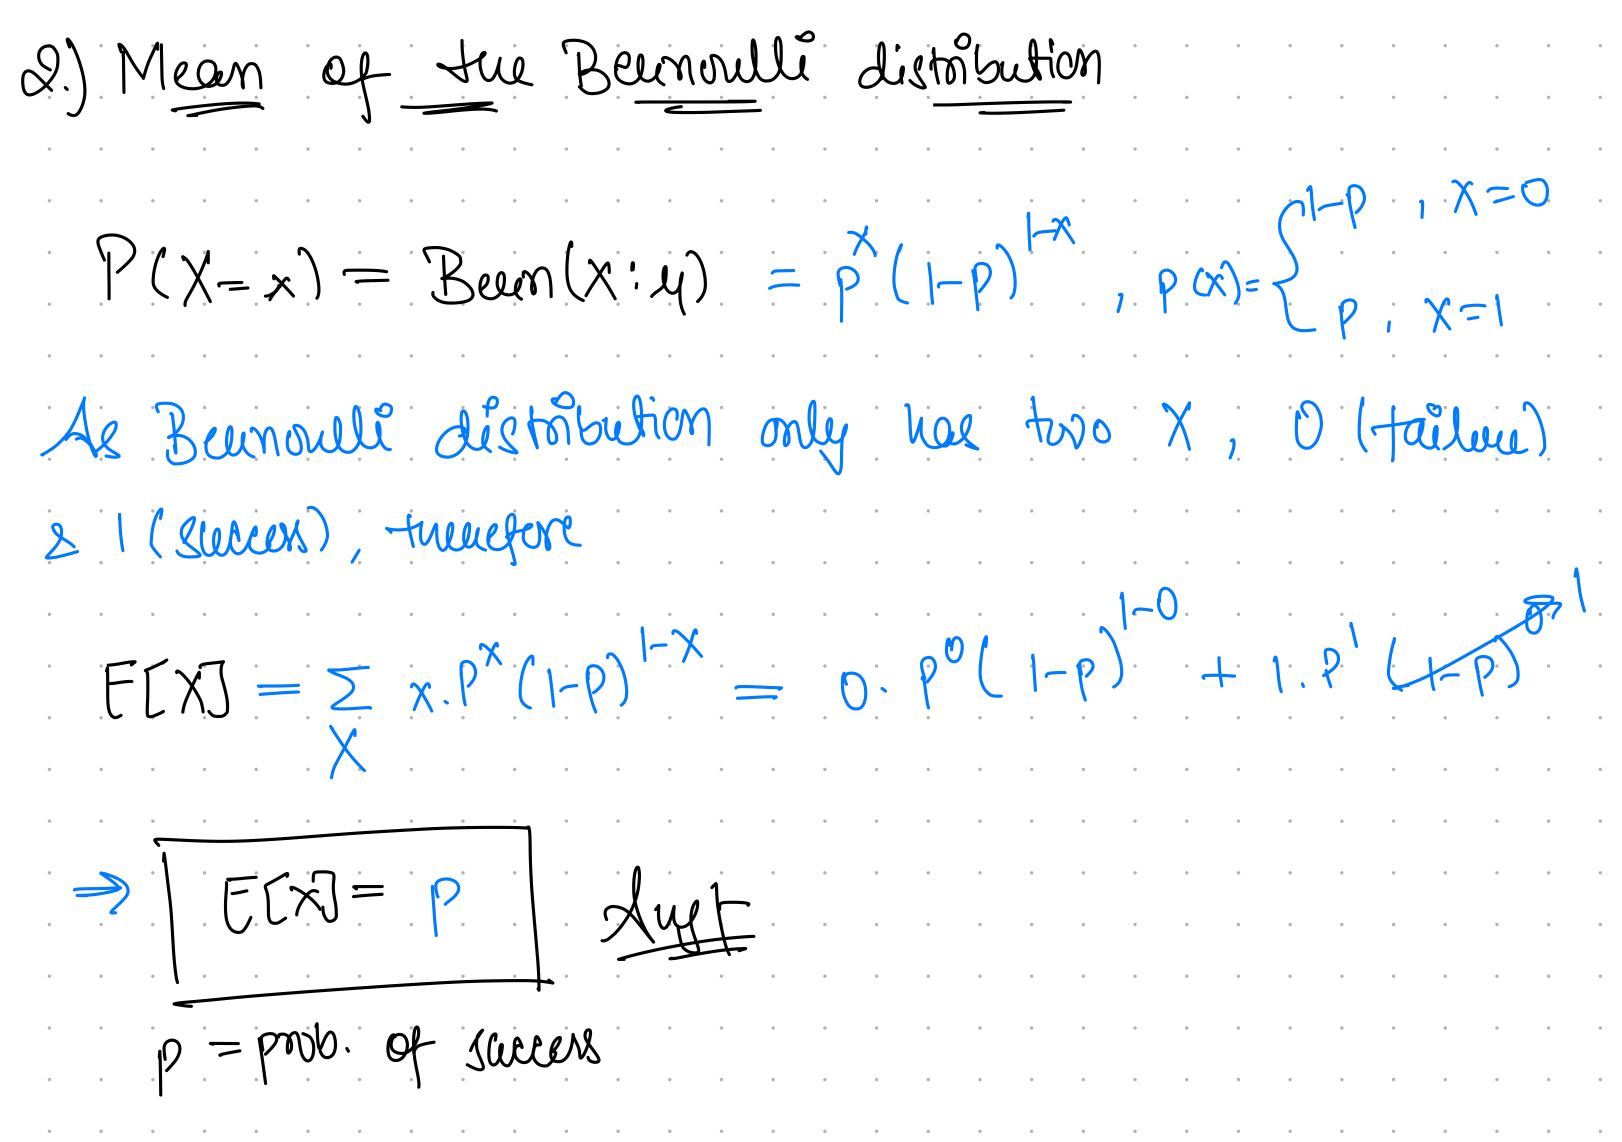

In [5]:
from IPython.display import Image
Image(filename='Q2.jpeg') 

## 3 Trees and Random Forests
(a)

Gini Index = 0.3654444230272821
Entropy = 0.39100641076929926
Misclassification Rate = 0.2695924764890282


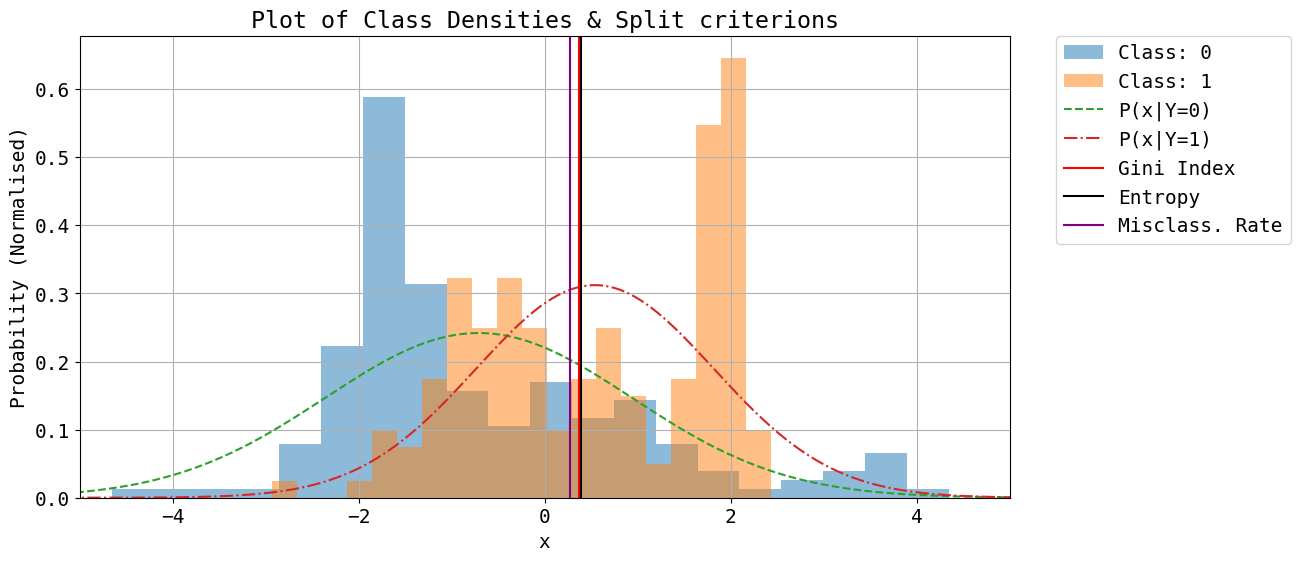

In [9]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them
sort_ind = np.argsort(pts)
pts = pts[sort_ind]
labels = labels[sort_ind]

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate


class node_impurity:
    '''
    Class to calculate impurity of a node making a split over an attribute A

    '''

    def __init__(self,node1,node2):
        '''
        node1 (ndarray): first node array
        node2 (ndarray): second node array
        '''
        self.node1 = node1
        self.node2 = node2 

        self.n1,self.n2 = len(node1),len(node2)
        self.n = self.n1 + self.n2

        
    def gini_a(self):
        '''
        Implementation of Gini Impurity among two nodes doing split over an attribute A
        '''
        def gini(l):
            '''
            Implementation for Gini index for one node/leaf
            '''
            p = np.unique(l,return_counts=True)[1]/l.shape[0]
            return 1-np.sum(p**2)

        return (self.n1/self.n)*gini(self.node1) + (self.n2/self.n)*gini(self.node2)
    
    def entropy_a(self):
        '''
        Implementation of Entropy Impurity among two nodes doing split over an attribute A
        '''
        def entropy(l):
            '''
            Implementation for Entropy for one node/leaf
            '''

            p = np.unique(l,return_counts=True)[1]/l.shape[0]
            return np.sum(-p*np.log2(p+1e-9))
             
            

        return (self.n1/self.n)*entropy(self.node1) + (self.n2/self.n)*entropy(self.node2)
        
    def mcr_a(self):
        '''
        Implementation of Misclassification rate among two nodes doing split over an attribute A
        '''
        def mcr(l):
            '''
            Implementation for Misclassification rate for one node/leaf
            '''
            # n = len(l)
            # p1 = len(l[np.where(l == 0)])/n
            # p2 = 1-p1
            # return 1 - np.max([p1,p2])

            p = np.unique(l,return_counts=True)[1]/l.shape[0]
            return 1 - np.max(p)

        return (self.n1/self.n)*mcr(self.node1) + (self.n2/self.n)*mcr(self.node2)
            

# TODO: Iterate over the possible splits, evaulating and saving the tree criteria for each one
splits = []
for i in range(1,len(pts)-1,2):
    #assigning pts and labels to nodes
    left_pts = pts[:i]
    left_label = labels[:i]

    right_pts = pts[i:len(pts)-1]
    right_label = labels[i:len(pts)-1]

    #creating dictionary for the pts and associated labels for every i split
    split={
    'left_pts ':left_pts ,
    'left_label':left_label, 

    'right_pts ':right_pts ,
    'right_label':right_label
    }
    splits.append(split)

# minimizing the impurities to get the best split value
split_gini = np.min([node_impurity(splits[i]['left_label'],splits[i]['right_label']).gini_a() for i in range(0,len(splits))])
split_entropy = np.min([node_impurity(splits[i]['left_label'],splits[i]['right_label']).entropy_a() for i in range(0,len(splits))])/2 #dividing by 2 to scale with gini and mcr
split_mcr = np.min([node_impurity(splits[i]['left_label'],splits[i]['right_label']).mcr_a() for i in range(0,len(splits))])

print(f'Gini Index = {split_gini}')
print(f'Entropy = {split_entropy}')
print(f'Misclassification Rate = {split_mcr}')

# TODO: Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)
plt.figure(figsize=(12,6))
plt.hist(pts0,label='Class: 0',bins=20,density=True,alpha=0.5);
plt.hist(pts1,label='Class: 1',bins=20,density=True,alpha=0.5);

plt.plot(x,lkd_0,label='P(x|Y=0)',linestyle='--')
plt.plot(x,lkd_1,label='P(x|Y=1)',linestyle='-.')

plt.axvline(split_gini, label='Gini Index',c='r');
plt.axvline(split_entropy, label='Entropy', c='k');
plt.axvline(split_mcr, label='Misclass. Rate', c='purple');

plt.xlim(-5,5)
plt.xlabel('x')
plt.ylabel('Probability (Normalised)')
plt.title('Plot of Class Densities & Split criterions')
plt.legend(loc=(1.05,0.55))
plt.grid()

(b)

In [23]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)
from sklearn.model_selection import train_test_split


# set aside N=200 of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(features.T, labels,
    test_size=200, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=200, random_state= 8) 


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (1524, 116)
X_test shape: (201, 116)
y_train shape: (1524,)
y_test shape: (201,)
X_val shape: (1524,)
y val shape: (201,)


In [36]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of hyperparameters as specified on the sheet
#       and evaluate the performances on the validation set.

hyp_params = {'trees':[5,10,20,100],'depth':[2,5,10,None]}
rfc = [RandomForestClassifier(n_estimators=hyp_params['trees'][i], 
                            criterion='gini',
                             max_depth=hyp_params['depth'][i]) for i in range(0,4)]

In [39]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set

# Fit RandomForestClassifier
[rfc[i].fit(X_train, y_train) for i in range(0,4)]

# Predict the test set labels
y_pred_set = [rfc[i].predict(X_test) for i in range(0,4)]

              precision    recall  f1-score   support

         0.0       0.59      0.86      0.70        85
         1.0       0.73      0.40      0.52        83
         2.0       1.00      1.00      1.00        33

    accuracy                           0.69       201
   macro avg       0.78      0.75      0.74       201
weighted avg       0.72      0.69      0.67       201



Text(0.5, 1.0, 'Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

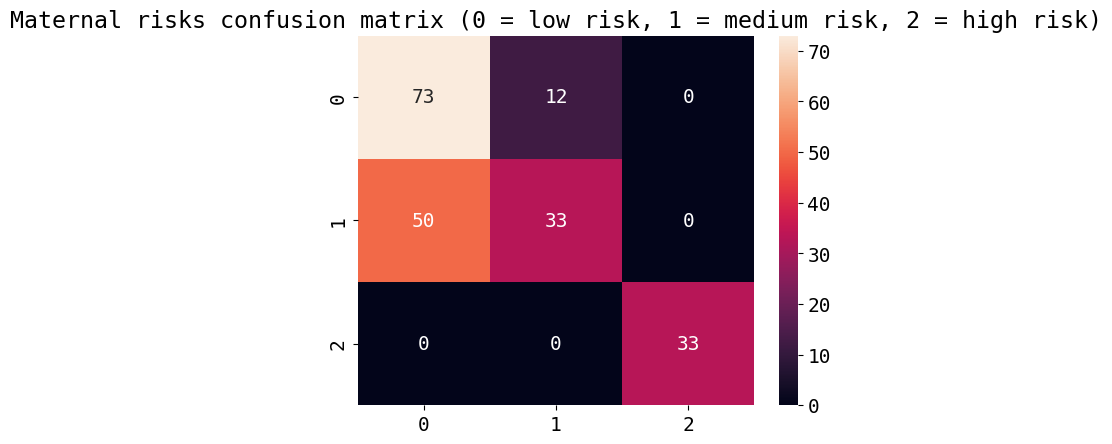

In [44]:
from sklearn.metrics import classification_report, confusion_matrix


cm = [confusion_matrix(y_test, y_pred_set[i]) for i in range(0,4)]

print(classification_report(y_test,y_pred_set[0]))
sns.heatmap(cm[0], annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

              precision    recall  f1-score   support

         0.0       0.60      0.85      0.70        85
         1.0       0.73      0.42      0.53        83
         2.0       1.00      1.00      1.00        33

    accuracy                           0.70       201
   macro avg       0.78      0.76      0.75       201
weighted avg       0.72      0.70      0.68       201



Text(0.5, 1.0, 'Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

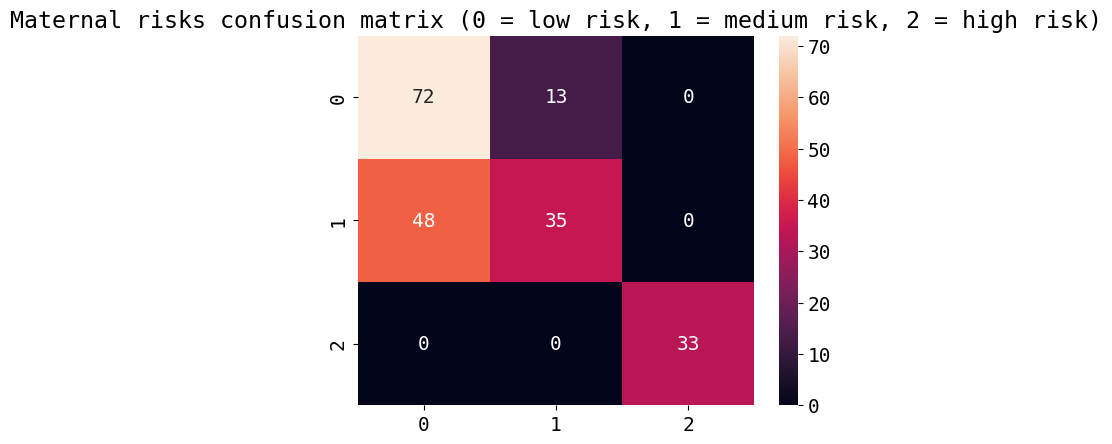

In [45]:
print(classification_report(y_test,y_pred_set[1]))
sns.heatmap(cm[1], annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

              precision    recall  f1-score   support

         0.0       0.66      0.84      0.74        85
         1.0       0.77      0.55      0.64        83
         2.0       1.00      1.00      1.00        33

    accuracy                           0.75       201
   macro avg       0.81      0.80      0.79       201
weighted avg       0.76      0.75      0.74       201



Text(0.5, 1.0, 'Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

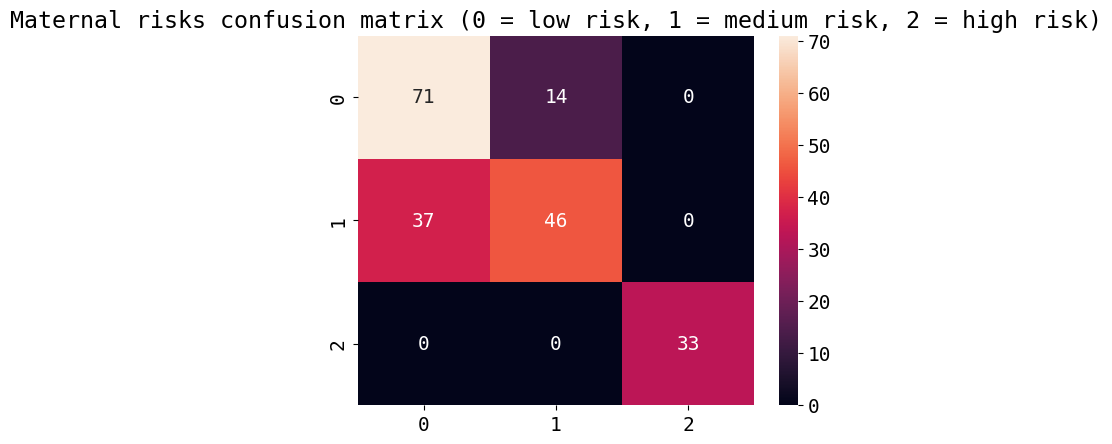

In [46]:
print(classification_report(y_test,y_pred_set[2]))
sns.heatmap(cm[2], annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

              precision    recall  f1-score   support

         0.0       0.65      0.82      0.73        85
         1.0       0.75      0.54      0.63        83
         2.0       1.00      1.00      1.00        33

    accuracy                           0.74       201
   macro avg       0.80      0.79      0.78       201
weighted avg       0.75      0.74      0.73       201



Text(0.5, 1.0, 'Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

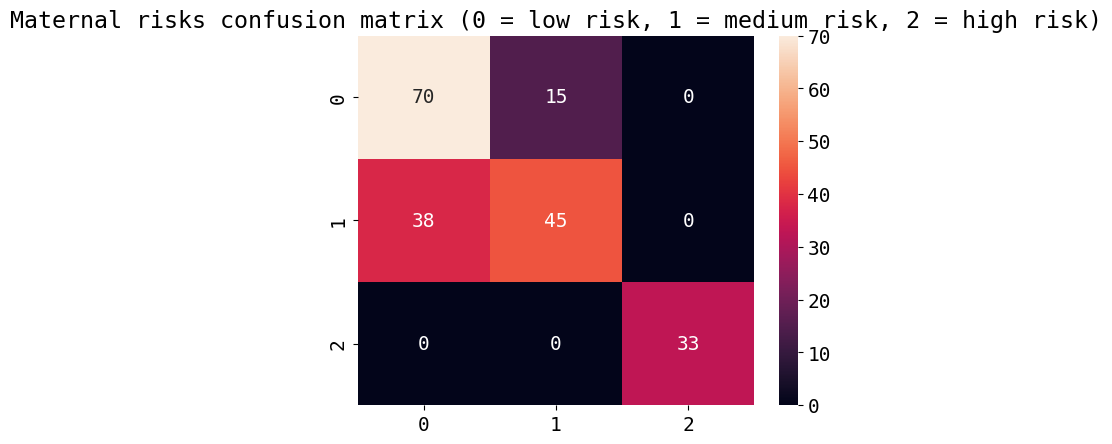

In [47]:
print(classification_report(y_test,y_pred_set[3]))
sns.heatmap(cm[3], annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

## 4 Beta Distribution

Answer 4.a) 

given that, first we estimate $p(x|\mu_x)$ using the function given in the question i.e. using  bernoulli distribution with mean $\mu_x$.

using Bayes' Theorem we can calculate the posterior distribution as 

\begin{equation}
p(\mu_x|x) = \frac{p(x|\mu_x)p(\mu_x)}{p(x)}
\end{equation}


\begin{equation}
p(\mu_x|x) = \frac{C_{x1}p(\mu_x)}{N_xp(x)}
\end{equation}


where likelihood $C_{x1} $ is the total number of data points labelled as 1 in the interval $|x-x_i|<r$ and $N_x$ is the total number of data points within the interval and $p(\mu_x)$ is the prior probability and p(x) can be calculated using the normalization


\begin{equation}
p(x) = \sum_{\mu_x} \frac{C_{x1}}{N}
\end{equation}



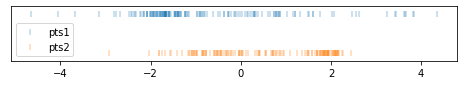

In [ ]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# split the data into the classes
pts1 = pts[labels==0]
pts2 = pts[labels==1]

# plot the data
fig, ax = plt.subplots(figsize=(8, 1))
plt.scatter(pts1, np.ones_like(pts1), label='pts1', marker='|', alpha=0.3)
plt.scatter(pts2, np.zeros_like(pts2), label='pts2', marker='|', alpha=0.3)
plt.legend()
plt.yticks([])
plt.ylim(-0.2, 1.2)
plt.show()

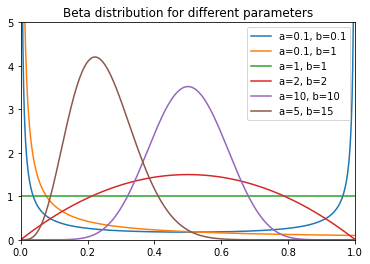

In [ ]:
from scipy.special import gamma, gammaln

def beta_pdf(x, a, b):
    """Probability density function for the Beta distribution with parameters a and b. Works verctorized over all inputs"""
#     return (gamma(a+b) * x**(a-1) * (1-x)**(b-1)) / gamma(a) / gamma(b)  # breaks down for larger a, b
    return np.exp(gammaln(a+b) - gammaln(a) - gammaln(b) + np.log(x)*(a-1) + np.log(1-x)*(b-1))  # works for larger a, b

eps = 1e-6
x = np.linspace(eps, 1-eps, 1000, endpoint=True)
for a, b in ((0.1, 0.1), (0.1, 1), (1, 1), (2, 2), (10, 10), (5, 15)):
    plt.plot(x, beta_pdf(x, a, b), label=f'{a=}, {b=}')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.title('Beta distribution for different parameters')
plt.show()

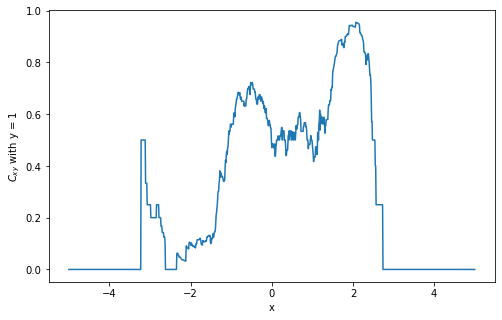

In [ ]:

def count_points_within_distance(x, pts, r):
    """
    Count number of points among pts within a distance r of query points x (in 1D).
    
    Parameters
    ----------
    x : np.ndarray
        Query points of shape (M).
    pts : np.ndarray
        Points to be searched, shape (N).
    r : float
        radius.
        
    Returns
    -------
    np.ndarray
        Array of counts of shape (M)
        
    """
    # TODO: sort the points

    pts_sorted = 1*np.sort(pts)

#     pts1 = pts_sorted[]
    
    # TODO: use np.searchsorted on the interval boundaries 
    #       to find number of points inside each interval (don't use loops!)

    # first i will create a stack array os shape (M,2) columns with first column for x-r and 
    # second column for x+r
    M = len(x)
    x_clmn = x.reshape(M,1)  ##changing query array to a column vector
    stack =  np.hstack((x_clmn-r,x_clmn+r))

    ##creating a lambda function for np searchsorted

    count_func = lambda count_func : len(np.where(np.searchsorted(count_func,pts_sorted)==1)[0])  ##performing searchsorted on [x-r,x+r]

    counts = np.array([count_func(stack[r,:].reshape(2)) for r in range(M)])


    
    return counts

# use a flat prior
prior_a, prior_b = 1, 1  

# define value range
vmin, vmax = -5, 5

# set the radius
r = .3

# TODO: sample x and mu as described in the exercise
# TODO: use count_points_within_distance to calculate the counts

# TODO (optional): plot the counts vs x
x1 = np.arange(-5,5.01,0.01)
count_arr = count_points_within_distance(x1,pts2,r)  ##pts2 because we only need to find the points with label 1
count_arr = np.array(count_arr,dtype = float) 
total_counts =  count_points_within_distance(x1,pts,r)  ##total points within the interval
index = np.where(total_counts!=0)
count_arr[index] = np.array(count_arr[index],dtype = float)/np.array(total_counts[index],dtype  = float)  ##finding probability for each interval
plt.figure(figsize = (8,5))
plt.xlabel('x')
plt.ylabel(r'$C_{xy}$ with y = 1')
plt.plot(x1,count_arr)



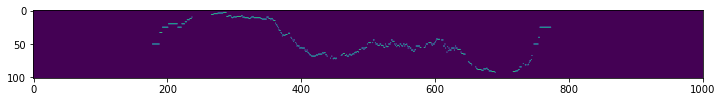

In [ ]:


# TODO: evaluate the posterior to get an image (use broadcasting, no loops needed!)

###well I can't think of a way for using non broadcasting :(
M = np.array([])
for i in range (len(mu_x)):
    post = np.where(count_arr==mu_x[i])[0]
    m_rows = np.zeros(len(x1))
    m_rows[post] = 1

    
    if(i==0):
        M = m_rows/(np.sum(m_rows))
    else:
        M = np.vstack((M,m_rows))     





# TODO: plot the posterior as an image, specify the correct origin and extent
plt.figure(figsize = (12,10))
plt.imshow(M)
plt.show()

# Attempt to avoid loops in part c

In [49]:
def count_points_within_distance(x, pts, r):
    """
    Count number of points among pts within a distance r of query points x (in 1D).
    
    Parameters
    ----------
    x : np.ndarray
        Query points of shape (M).
    pts : np.ndarray
        Points to be searched, shape (N).
    r : float
        radius.
        
    Returns
    -------
    np.ndarray
        Array of counts of shape (M)
        
    """
    # TODO: sort the points
    pts = np.sort(pts)
    
    # TODO: use np.searchsorted on the interval boundaries 
    #       to find number of points inside each interval (don't use loops!)
    r_up =x+r
    r_bel = x-r
    ind = np.searchsorted(r_up,r_bel) #used to create an array with boundaries eg: [-0.3,0.3,0.7,1.3...] if x is [0,1,2...] and r=0.3
    boundaries = np.insert (r_up,ind,r_bel)
    search = np.searchsorted(boundaries,pts) #finds the indices of pts points between -0.3 and 0.3, 0.3 and 0.7, etc
    search = search[np.where((search%2)!=0)] #seperates indices of points lying only between -0.3 and 0.3, 0.7 and 1.3,etc
    counts = np.unique(search,return_counts=True)[1] # returns counts
         
    return counts

## **This method failed becuase in our case r is bigger than the seperation between points in x.**